# Exercício - Mini Projeto de Análise de Dados
    
Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.
    
Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.
    
### O que temos?
    
Temos os dados de 2019 de uma empresa de prestação de serviços. 
    
- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados
    
Obs1: Para ler arquivos csv, temos o read_csv
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel
    
### O que queremos saber/fazer?
    
1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? 
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
    . Na base de funcionários temos uma lista com todos os funcionários
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou
    
    
5. Calcule o total de funcionários por área
    
    
6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()
    
Obs: Lembrando as opções mais usuais de encoding:
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'
    
Observação Importante: Se o seu código der um erro na hora de importar os arquivos:
- CadastroClientes.csv
- CadastroFuncionarios.csv
    
Use separador \";\" (ponto e vírgula) para resolver e inclua o parâmetro decimal ',' para o pandas identificar os números corretamente"


In [2]:
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=";", decimal=',')
servicos_prestados_df = pd.read_excel('BaseServiçosPrestados.xlsx')

#Remover Colunas
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)


print("--- Funcionários --- --- Funcionários --- --- Funcionários --- --- Funcionários --- ")
display(funcionarios_df)
print('--- Clientes ------ Clientes ------ Clientes ------ Clientes ------ Clientes ------')
display(clientes_df)
print("--- Serviços Prestados ------ Serviços Prestados ------ Serviços Prestados ---")
display(servicos_prestados_df)


--- Funcionários --- --- Funcionários --- --- Funcionários --- --- Funcionários --- 


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


--- Clientes ------ Clientes ------ Clientes ------ Clientes ------ Clientes ------


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


--- Serviços Prestados ------ Serviços Prestados ------ Serviços Prestados ---


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### Valor Total da Folha Salarial

In [3]:
funcionarios_df["Salario Total"] = ( funcionarios_df["Salario Base"] + funcionarios_df["Impostos"] + 
                                    funcionarios_df["Beneficios"] + funcionarios_df["VT"] + funcionarios_df["VR"]
                                    )
display(funcionarios_df)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


### Gasto total com salários de funcionários pela empresa

In [7]:
gasto_total_salario = funcionarios_df['Salario Total'].sum()

print("Total da Folha Salarial mensal é de R${:,}".format(gasto_total_salario))

Total da Folha Salarial mensal é de R$2,717,493.22


### 2. Qual foi o faturamento da empresa

In [13]:
faturamento_df = clientes_df.merge(servicos_prestados_df, on="ID Cliente")

faturamento_df["Valor Contrato"] = faturamento_df['Valor Contrato Mensal'] * faturamento_df["Tempo Total de Contrato (Meses)"]

display(faturamento_df)

print("Faturamento da Empresa é de R$ {:,}".format(faturamento_df['Valor Contrato'].sum()))


,ID Cliente,Cliente,Valor Contrato Mensal,Codigo do Servico,ID Funcionário,Tempo Total de Contrato (Meses),Valor Contrato
0,1,Teixeira Gonçalves,540,OS0001,67,14,7560
1,2,Souza Santos,1260,OS0002,17,12,15120
2,4,Santos Costa,2520,OS0003,116,14,35280
3,5,Do Monteiro,3510,OS0004,37,8,28080
4,6,Soares Lobo,2340,OS0005,130,8,18720
...,...,...,...,...,...,...,...
232,315,Americo Bomfim,1575,OS0233,111,4,6300
233,316,Manoel Costa,3690,OS0234,124,8,29520
234,317,Gomes Machado,2385,OS0235,72,6,14310
235,319,Pereira Fazenda,4185,OS0236,90,14,58590


Faturamento da Empresa é de R$ 5,519,160


### 3. Qual o % de funcionários que já fechou algum contrato

In [26]:
funcionarios_nome_df = funcionarios_df[["ID Funcionário", "Nome Completo"]]

funcionarios_nome_df = servicos_prestados_df.merge(funcionarios_nome_df, on="ID Funcionário")

quant_func_fechou_contrato = funcionarios_nome_df.groupby("ID Funcionário").sum()


fechou_servico = len(quant_func_fechou_contrato["Nome Completo"])
todos_funcionarios = len(funcionarios_df["Nome Completo"])

print("Percentual de Funcionários que fecharam serviço é {:.2%}".format(fechou_servico / todos_funcionarios))

Percentual de Funcionários que fecharam serviço é 86.84%


### 4. Calcule o total de contratos que cada área da empresa já fechou

In [31]:
contratos_df = faturamento_df.merge(funcionarios_df[["ID Funcionário", "Area"]], on="ID Funcionário")
quant_contratos = contratos_df["Area"].value_counts()



display(quant_contratos)

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64

### 5. Calcule o total de funcionários por área

Area
Financeiro        18
Logística         21
Operações         23
Administrativo    26
Comercial         26
Name: count, dtype: int64


<Axes: xlabel='Area'>

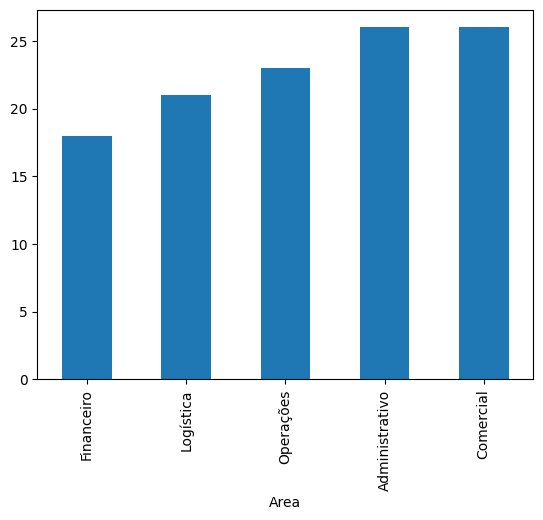

In [43]:
funcionario_are = funcionarios_df["Area"].value_counts().sort_values(ascending=True)
print(funcionario_are)
funcionario_are.plot(kind="bar")

### 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos

In [5]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print("O ticket médio mensal da empres é de R${:,.2f}".format(ticket_medio))

O ticket médio mensal da empres é de R$2,502.56
